In [1]:
import sys
sys.path.insert(1, '/home/mlfm/tam/python_graph_utitilies_v2/Codes/')
import torch
from dataset import OneDDatasetBuilder, OneDDatasetLoader

# dataset = OneDDatasetBuilder
#     raw_dir='/data1/tam/datasets',
#     root_dir='/data1/tam/downloaded_datasets_new',
#     data_names='all',
#     time_names=[str(i).zfill(3) for i in range(201)],
#     data_type=torch.float32
# )

dataset = OneDDatasetLoader(
    root_dir='/data1/tam/downloaded_datasets_new',
    sub_dir='processed',
    data_names='all',
    time_names=[str(i).zfill(3) for i in range(201)]
)
dataset[0]

TorchGraphData(edge_index=[2, 59768], edge_attr=[59768, 8], node_attr=[59769, 3], pressure=[59769, 201], flowrate=[59769, 201])

In [2]:
normed_dataset = dataset.normalizing()
# normed_dataset.scaler('flowrate').lambdas_

In [3]:
batched_dataset = normed_dataset.batching(
    batch_size = 1000,
    batch_n_times = 50, 
    recursive = True, 
    sub_dir='/normed_and_batched', 
    step=1
)

TorchGraphData(edge_index=[2, 59768], edge_attr=[59768, 8], node_attr=[59769, 3], pressure=[59769, 201], flowrate=[59769, 201])


Text(0.5, 1.0, 'flowrate')

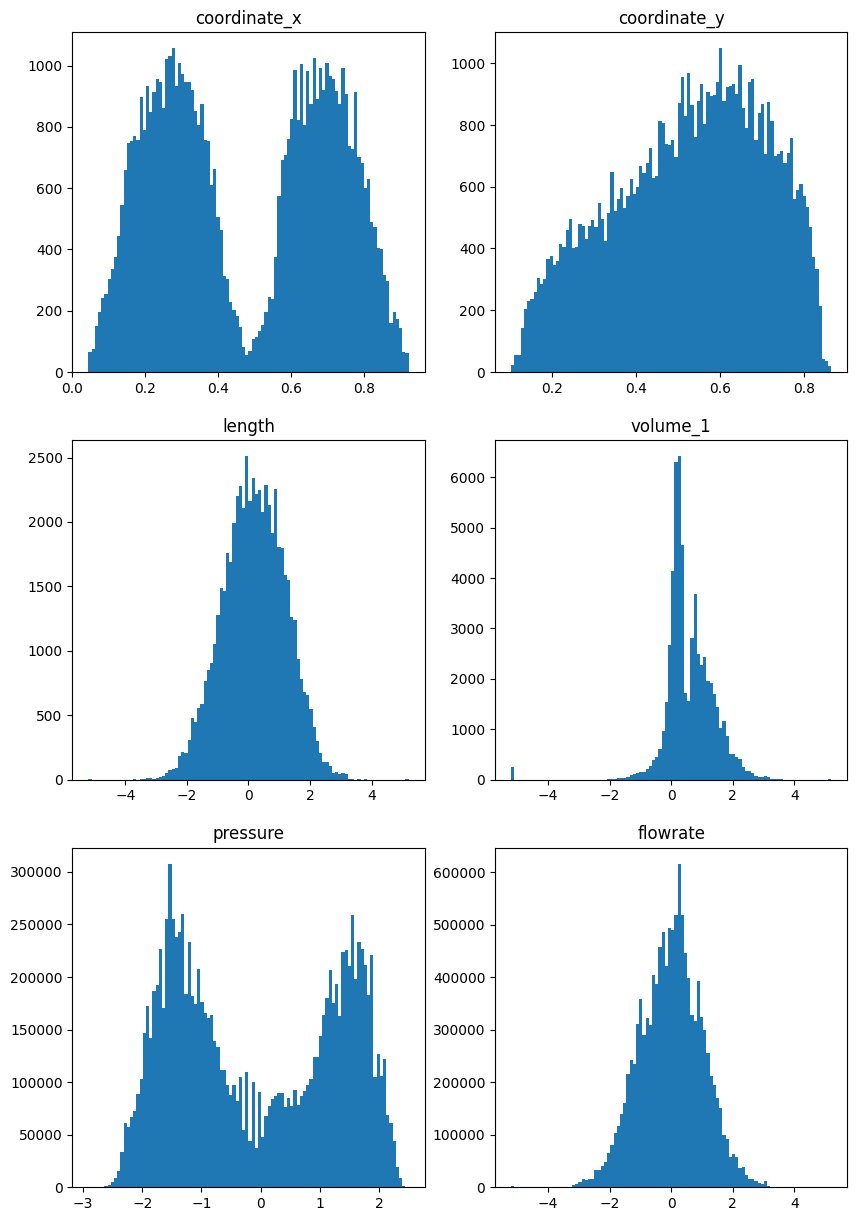

In [4]:
import matplotlib.pyplot as plt

normed_dataset = OneDDatasetLoader(
    root_dir='/data1/tam/downloaded_datasets_new',
    sub_dir='normalized',
    data_names='all',
    time_names=[str(i).zfill(3) for i in range(201)]
)

data = normed_dataset[0]
print(data)

fig, ax = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(10)

ax[0,0].hist(data.node_attr[:, 0], bins=100)
ax[0,0].set_title('coordinate_x')
ax[0,1].hist(data.node_attr[:, 1], bins=100)
ax[0,1].set_title('coordinate_y')

ax[1,0].hist(data.edge_attr[:, 0], bins=100)
ax[1,0].set_title('length')
ax[1,1].hist(data.edge_attr[:, 5], bins=100)
ax[1,1].set_title('volume_1')

ax[2,0].hist(data.pressure.flatten(), bins=100)
ax[2,0].set_title('pressure')
ax[2,1].hist(data.flowrate.flatten(), bins=100)
ax[2,1].set_title('flowrate')

In [ ]:
y = dataset[0].edge_attr

i=1
print(y[:,i])

import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PowerTransformer, MinMaxScaler, RobustScaler, QuantileTransformer, StandardScaler

transform1 = PowerTransformer()
transform1.fit(y)
transform1.lambdas_=[-0.24738493, -3.92501757,  1.07366881,  0.31679522,  1.95672088, -0.19925361, -0.16171953,  0.75660708]
# transform1.lambdas_[1] = -1.
y1 = transform1.transform(y)

plt.xlim([-20,20])
plt.hist(y[:,i], bins=100)
plt.show()

# plt.xlim([-20,20])
plt.hist(y1[:,i], bins=10)
plt.show()
plt.plot(y1[:,i])
plt.show()

# plt.xlim([-20,20])
# plt.hist(y2, bins=50)
# plt.show()

In [ ]:
var = []
for i in range(dataset.len()):
    data = dataset[i].edge_attr
    var.append(data)
var = torch.cat(var, dim=0)

from sklearn.preprocessing import PowerTransformer
transform = PowerTransformer()
transform.fit(var)
print(transform.lambdas_)
_var = transform.transform(var)


# from sklearn.preprocessing import MinMaxScaler
# transform = MinMaxScaler()
# transform.fit(var)
# _var = transform.transform(var)
# _var.min(), _var.max()

var0 = dataset[0].edge_attr
_var0 = transform.transform(var0)

In [ ]:
print(_var.mean(axis=0), _var.var(axis=0), _var.min(axis=0), _var.max(axis=0))
import matplotlib.pyplot as plt
y = _var[:,1]
plt.hist(y, bins=100)
plt.show()

print(_var0.mean(axis=0), _var0.var(axis=0), _var0.min(axis=0), _var0.max(axis=0))
y0 = _var0[:,1]
plt.hist(y0, bins=100)
plt.show()

In [ ]:
import pickle
from sklearn.preprocessing import MinMaxScaler

x = dataset[0].node_attr
scaler = MinMaxScaler()
scaler.fit(x)

with open('scaler.pkl','wb') as f:
    pickle.dump(scaler, f)